<a href="https://colab.research.google.com/github/ashwinamrutphale/aml-homeworks/blob/master/homework4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [173]:
from google.colab import drive
from google.colab import files
drive.mount('/content/gdrive')
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.image as mpimg
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import euclidean_distances
import pandas as pd
import scipy as sp

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

def plot_CIFAR(input,title):
    R = input[0:1024].reshape(32,32)/255.0
    G = input[1024:2048].reshape(32,32)/255.0
    B = input[2048:].reshape(32,32)/255.0
    img = np.dstack((R,G,B))
    fig = plt.figure(figsize=(3,3))
    ax = fig.add_subplot(111)
    ax.imshow(img,interpolation='bicubic')
    ax.set_title('Category = '+ title,fontsize =15)

def sort_images(dict_input):
  index = 0
  for val in dict_input[b'data']:
    label = dict_input[b'labels'][index]
    r_idx = result_index[label]
    images[label][r_idx] = val
    index = index  +1
    result_index[label]  = result_index[label] +1

def get_mean_images():
  idx = 0
  for im in images:
    mean_images[idx]  = np.mean(im, axis=0)
    idx +=1
    
def plot_mean_images():
  idx=0
  for mi in mean_images:
    plot_CIFAR(mi[0],class_names[idx])
    idx += 1
    
def pca_errror():
  indx = 0
  for imgs in images:
    pca = PCA(n_components=20)
    pca.fit(imgs)
    imgs_pca = pca.transform(imgs)
    imgs_projected = pca.inverse_transform(imgs_pca)
    loss = np.mean(np.sum(((imgs - imgs_projected)**2),axis=1))
    loss_sum[indx] = loss
    indx +=1

def plot_error_bar():
  plt.bar(class_names, loss_sum, align='center', alpha=0.5)
  plt.xlabel('Image Class', fontsize=10)
  plt.ylabel('Loss', fontsize=10)
  plt.xticks(class_names, fontsize=10, rotation=30)
  plt.show()

def compute_dist_mtrx():
  i = 0
  j = 0
  for a in mean_images:
    for b in mean_images:
      dist_matrix[i][j] = np.linalg.norm(a[0]-b[0])
      j += 1
    i += 1
    j = 0
    
#a and b as index of class which can be used on global vars    
def pca_a_with_b(a,b):
  if intermediate_result[a][b] == 0:
    pc = PCA(n_components=20)
    pc.fit(images[b])
    imgs_a_pca = (images[a]- mean_images[a][0]).dot(pc.components_.T)
    imgs_a_projects = imgs_a_pca.dot(pc.components_) + mean_images[a][0]
    intermediate_result[a][b] = np.mean(np.sum(((images[a] - imgs_a_projects)**2),axis=1))
    
  return intermediate_result[a][b]

def compute_distance_part_c():
  for i in range(10):
    for j in range(10):
      dist_matrix_part_c[i][j] = (pca_a_with_b(i,j) + pca_a_with_b(j,i))/2
      

def multi_dimensional_scaling(D):
  n = len(D)
  # Centering matrix                                                                        
  H = np.eye(n) - np.ones((n, n))/n
  # YY^T                                                                                    
  B = -H.dot(D).dot(H)/2
  # Diagonalize                                                                             
  evals, evecs = sp.linalg.eigh(B,eigvals=(8,9))
  # Sort by eigenvalue in descending order                                                  
  idx   = np.argsort(evals)[::-1]
  evals = evals[idx]
  evecs = evecs[:,idx]
  # Compute the coordinates using positive-eigenvalued components only                      
  w, = np.where(evals > 0)
  L  = np.diag(np.sqrt(evals[w]))
  V  = evecs[:,w]
  Y  = V.dot(L)
  return Y
  
def plot_mds(mds):
  plt.figure()
  plt.scatter(mds[:,0],mds[:, -1])
  labels = ['Variable {0}'.format(i+1) for i in range(10)]
  for i in range (0,10):
    xy=(mds[i][0],mds[i][1])
    plt.annotate(class_names[i],xy)
  plt.plot()
  
      

    

In [0]:
dict_1 = unpickle('/content/gdrive/''My Drive''/aml-homeworks/homework4/data_batch_1')
dict_2 = unpickle('/content/gdrive/''My Drive''/aml-homeworks/homework4/data_batch_2')
dict_3 = unpickle('/content/gdrive/''My Drive''/aml-homeworks/homework4/data_batch_3')
dict_4 = unpickle('/content/gdrive/''My Drive''/aml-homeworks/homework4/data_batch_4')
dict_5 = unpickle('/content/gdrive/''My Drive''/aml-homeworks/homework4/data_batch_5')
dict_test = unpickle('/content/gdrive/''My Drive''/aml-homeworks/homework4/test_batch')

In [0]:


images = np.zeros([10,6000,3072])
result_index = np.zeros([10]).astype(int)

sort_images(dict_1)
sort_images(dict_2)
sort_images(dict_3)
sort_images(dict_4)
sort_images(dict_5)
sort_images(dict_test)

mean_images = np.zeros([10,1,3072])

get_mean_images()


In [0]:

class_names = np.array(['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'])
loss_sum = np.zeros(10)
pca_errror()
plot_error_bar()
#plot_error_bar()


In [0]:
dist_matrix = np.zeros([10,10])
compute_dist_mtrx()
sqr_mtrx = np.square(dist_matrix)
df_dst = pd.DataFrame(sqr_mtrx)
df_dst
df_dst.to_csv('partb_distances.csv',header=False,index=False)
files.download('partb_distances.csv')


In [0]:
dist_matrix_part_c = np.zeros([10,10])
intermediate_result = np.zeros([10,10])
compute_distance_part_c()
df_dst_c = pd.DataFrame(dist_matrix_part_c)
df_dst_c.to_csv('partc_distances.csv',header=False,index=False)
files.download('partc_distances.csv')


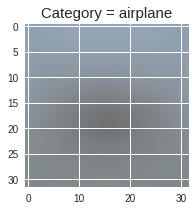

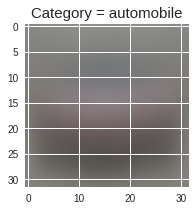

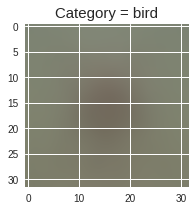

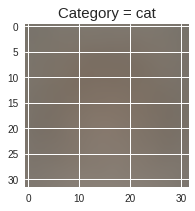

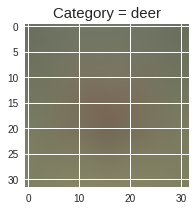

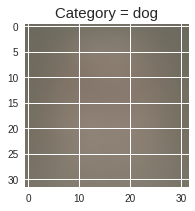

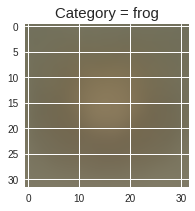

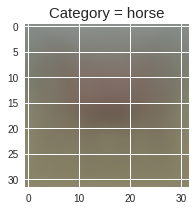

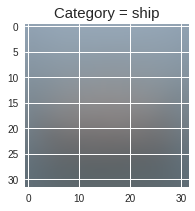

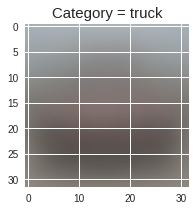

In [196]:
plot_mean_images()

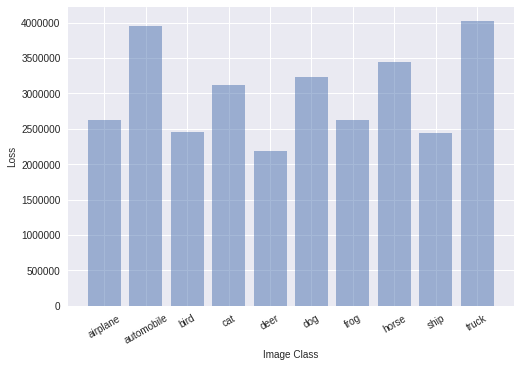

In [197]:
plot_error_bar()

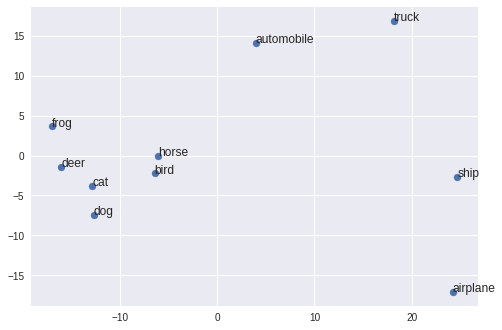

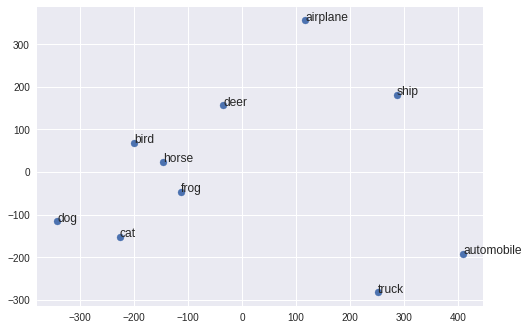

In [198]:
plot_mds(multi_dimensional_scaling(dist_matrix))
plot_mds(multi_dimensional_scaling(dist_matrix_part_c))